In [392]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
from sklearn import linear_model

In [350]:
trap_data = pd.read_csv('Trap_Data.csv')
growers = pd.read_csv('Growers.csv')
dublin = pd.read_csv('Dublin_Airport.csv')

In [351]:
data = trap_data.sort_values( ['Year', 'FarmID', 'Week'] )
data

,Year,FarmID,Date,Week,Male_SWD,Female_SWD,Total_SWD,Drosophilids,Similar
0,2015,A,02/06/2015,23,0,0,0.0,1,0
1,2015,A,02/06/2015,23,0,0,0.0,5,0
2,2015,A,02/06/2015,23,0,0,0.0,0,0
3,2015,A,02/06/2015,23,0,0,0.0,1,0
4,2015,A,02/06/2015,23,0,0,0.0,5,0
...,...,...,...,...,...,...,...,...,...
2419,2018,Y,01/10/2018,40,0,0,0.0,NaN,NaN
2420,2018,Y,01/10/2018,40,NaN,NaN,0.0,NaN,NaN
2581,2018,Y,12/11/2018,46,0,0,0.0,0,0
2582,2018,Y,12/11/2018,46,0,0,0.0,0,0


In [352]:
trap = pd.merge(data,growers, on='FarmID')
trap

,Year,FarmID,Date,Week,Male_SWD,Female_SWD,Total_SWD,Drosophilids,Similar,Grower
0,2015,A,02/06/2015,23,0,0,0.0,1,0,Dublin Airport
1,2015,A,02/06/2015,23,0,0,0.0,5,0,Dublin Airport
2,2015,A,02/06/2015,23,0,0,0.0,0,0,Dublin Airport
3,2015,A,02/06/2015,23,0,0,0.0,1,0,Dublin Airport
4,2015,A,02/06/2015,23,0,0,0.0,5,0,Dublin Airport
...,...,...,...,...,...,...,...,...,...,...
2397,2018,U,27/11/2018,48,11,11,22.0,5,0,"Dundalk, Louth"
2398,2018,U,04/12/2018,49,NaN,NaN,NaN,NaN,NaN,"Dundalk, Louth"
2399,2018,U,04/12/2018,49,NaN,NaN,NaN,NaN,NaN,"Dundalk, Louth"
2400,2018,U,11/12/2018,50,72,30,102.0,3,0,"Dundalk, Louth"


In [353]:
dublin1 = trap[trap.FarmID == 'A']
dublin1

,Year,FarmID,Date,Week,Male_SWD,Female_SWD,Total_SWD,Drosophilids,Similar,Grower
0,2015,A,02/06/2015,23,0,0,0.0,1,0,Dublin Airport
1,2015,A,02/06/2015,23,0,0,0.0,5,0,Dublin Airport
2,2015,A,02/06/2015,23,0,0,0.0,0,0,Dublin Airport
3,2015,A,02/06/2015,23,0,0,0.0,1,0,Dublin Airport
4,2015,A,02/06/2015,23,0,0,0.0,5,0,Dublin Airport
...,...,...,...,...,...,...,...,...,...,...
1196,2018,A,06/12/2018,49,91,71,162.0,380,2,Dublin Airport
1197,2018,A,06/12/2018,49,171,220,391.0,45,0,Dublin Airport
1198,2018,A,06/12/2018,49,251,215,466.0,20,0,Dublin Airport
1199,2018,A,06/12/2018,49,363,341,704.0,46,0,Dublin Airport


In [355]:
dublin_trap = pd.merge(dublin,dublin1, on='Date')

In [356]:
dublin_trap.to_csv('dublin_trap',index=False)

In [358]:
date_data = pd.read_csv('dublin_trap.csv', parse_dates=['Date'])

In [359]:
date_data.groupby('Date')

In [380]:
dublin_trap1 = date_data.fillna(value = 0)
dublin_trap1

,Date,Week_x,Max_Temp,Min_Temp,Rain,Year,FarmID,Week_y,Male_SWD,Female_SWD,Total_SWD,Drosophilids,Similar,Grower
0,2015-02-06,23,14.9,6.7,1.6,2015,A,23,0.0,0.0,0.0,1.0,0.0,Dublin Airport
1,2015-02-06,23,14.9,6.7,1.6,2015,A,23,0.0,0.0,0.0,5.0,0.0,Dublin Airport
2,2015-02-06,23,14.9,6.7,1.6,2015,A,23,0.0,0.0,0.0,0.0,0.0,Dublin Airport
3,2015-02-06,23,14.9,6.7,1.6,2015,A,23,0.0,0.0,0.0,1.0,0.0,Dublin Airport
4,2015-02-06,23,14.9,6.7,1.6,2015,A,23,0.0,0.0,0.0,5.0,0.0,Dublin Airport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,2018-06-12,49,13.2,9.8,1.9,2018,A,49,91.0,71.0,162.0,380.0,2.0,Dublin Airport
1197,2018-06-12,49,13.2,9.8,1.9,2018,A,49,171.0,220.0,391.0,45.0,0.0,Dublin Airport
1198,2018-06-12,49,13.2,9.8,1.9,2018,A,49,251.0,215.0,466.0,20.0,0.0,Dublin Airport
1199,2018-06-12,49,13.2,9.8,1.9,2018,A,49,363.0,341.0,704.0,46.0,0.0,Dublin Airport


In [381]:
dublin_trap1.isnull().sum()

Date            0
Week_x          0
Max_Temp        0
Min_Temp        0
Rain            0
Year            0
FarmID          0
Week_y          0
Male_SWD        0
Female_SWD      0
Total_SWD       0
Drosophilids    0
Similar         0
Grower          0
dtype: int64

In [388]:
dublin_group = dublin_trap1.groupby('Date').aggregate({'Min_Temp':'max', 
                                        'Rain':'mean', 
                                        'Max_Temp':'mean', 
                                        'Total_SWD':'max',
                                        'Drosophilids':'max',
                                        'Male_SWD':'max',
                                        'Female_SWD':'max',
                                        'Similar':'max'})."Year"
dublin_group

SyntaxError: invalid syntax (1464356740.py, line 8)

In [367]:
group = dublin_group.sort_values(by='Date',ascending=True)

In [369]:
group.to_csv('dublin_group')

In [389]:
group = pd.read_csv('dublin_group.csv')
group

,Date,Min_Temp,Rain,Max_Temp,Total_SWD,Drosophilids,Male_SWD,Female_SWD,Similar,Week,Year
0,06/02/2015,6.7,1.6,14.9,0.0,6.0,0,0.0,0.0,6,2015
1,11/02/2015,9.7,0.1,15.4,125.0,345.0,72,53.0,19.0,7,2015
2,12/02/2015,5.0,0.4,12.8,5.0,150.0,3,2.0,3.0,7,2015
3,08/04/2015,12.8,0.3,18.7,2.0,317.0,2,1.0,13.0,15,2015
4,10/05/2015,11.8,12.0,16.6,1.0,82.0,0,1.0,4.0,20,2015
...,...,...,...,...,...,...,...,...,...,...,...
116,10/09/2018,13.4,0.0,17.5,2296.0,169.0,1688,608.0,51.0,37,2018
117,21/09/2018,6.1,1.0,14.1,809.5,257.0,565,244.5,12.0,38,2018
118,18/10/2018,-0.1,0.0,13.3,1096.0,215.0,785,311.0,17.0,42,2018
119,28/10/2018,-2.9,0.0,9.8,521.5,154.5,340,181.5,17.0,44,2018


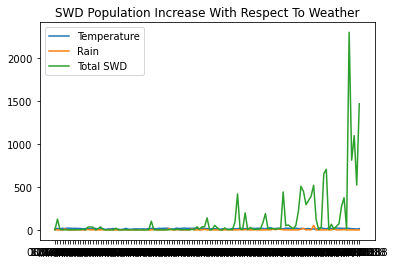

In [394]:
plt.title('SWD Population Increase With Respect To Weather')

plt.plot(group.Date,group.Max_Temp, label='Temperature')
plt.plot(group.Date,group.Rain, label='Rain')
plt.plot(group.Date,group.Total_SWD, label='Total SWD')
plt.legend()
plt.savefig('SWD Population Increase With Respect To Weather.jpg')
plt.show()

In [396]:
reg = linear_model.LinearRegression()

In [397]:
reg.fit(group['Max_Temp','Rain','Date'],group.Total_SWD)

KeyError: ('Max_Temp', 'Rain', 'Date')